<a href="https://colab.research.google.com/github/NikolaevaEV/PDA_SOL/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python/bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [30]:
df.to_excel("bikes.xlsx", sheet_name='data')
from google.colab import files
files.download('bikes.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [32]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [33]:
df.isnull().sum()

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

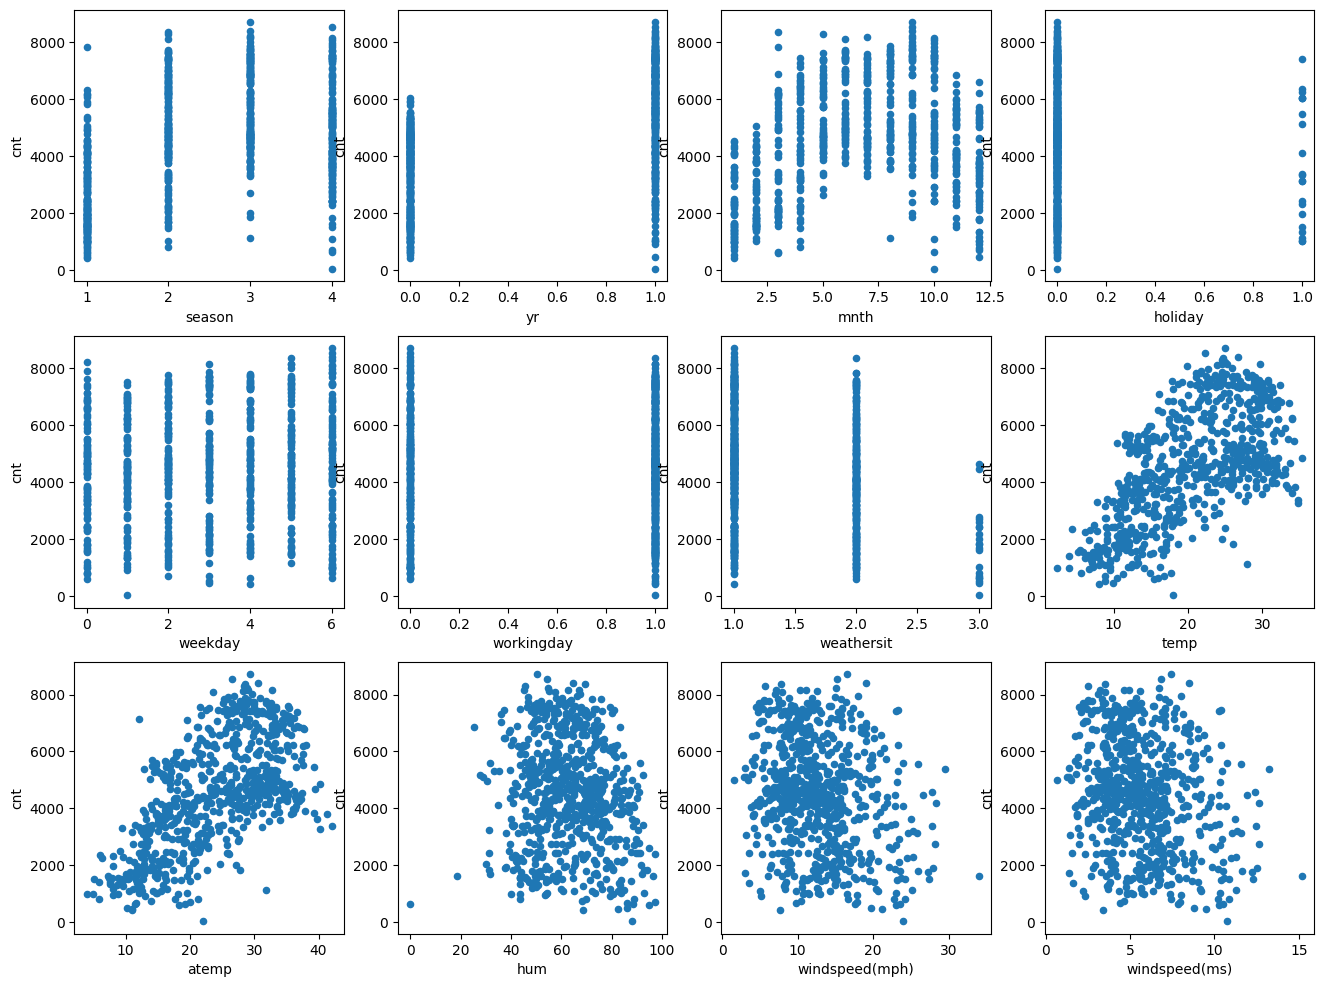

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ:

> наименьшее число прокатов явно в начале и конце года (скорее всего из-за низкой температуры), наибольшее - в летние месяцы.


#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ:

> temp/atemp.



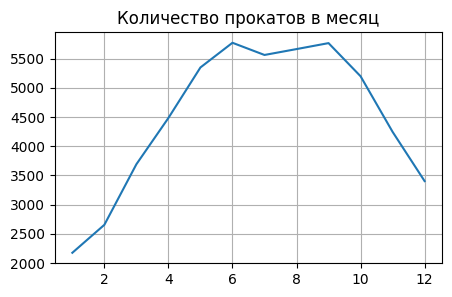

In [35]:
rentals_by_month = df.groupby('mnth')['cnt'].mean()

plt.figure(figsize=(5, 3))
plt.plot(rentals_by_month.index, rentals_by_month)
plt.title('Количество прокатов в месяц')
plt.grid(True)
plt.show()

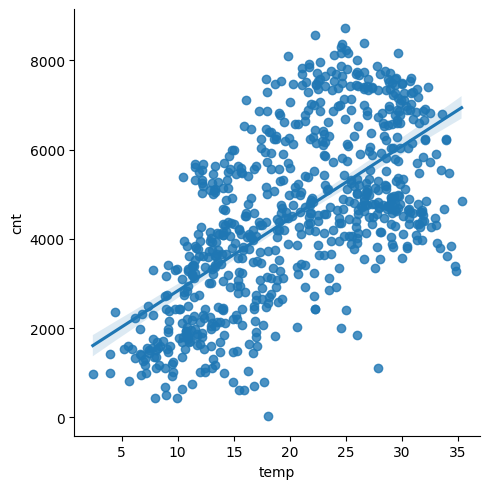

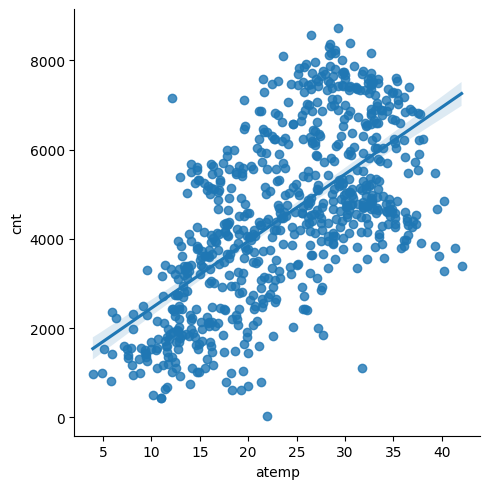

In [36]:
sns.lmplot(x='temp', y='cnt', data=df)
sns.lmplot(x='atemp', y='cnt', data=df)

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ:

> меньше всего коррелирует с holiday, weekday, workingday, hum

> больше всего коррелирует с temp, atemp, season



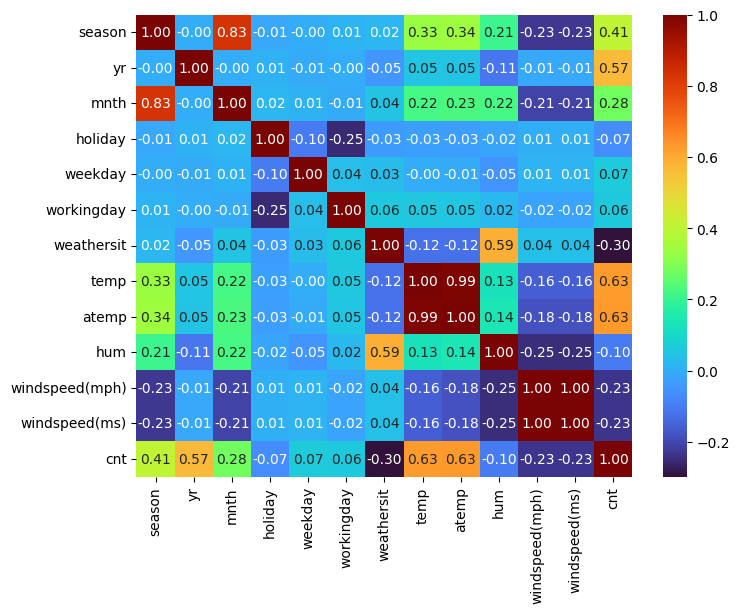

In [37]:
m_corr=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(m_corr,annot=True,fmt=".2f",cmap="turbo")
plt.show()

In [38]:
df.iloc[:, :-1].corrwith(df.cnt)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ:

> Так как количество прокатов в 2012 году заметно больше, чем в 2011, то можно сделать 2 предположения:
- либо услуга проката велосипедов в 2012 году стала гораздо популярнее, чем в предыдущем году (увеличилось количество точек проката, расширилась география, была проведена рекламная кампания);
- либо при сборе/обработке информации по количеству прокатов часть данных за 2011 год была утеряна



<Axes: xlabel='mnth', ylabel='cnt'>

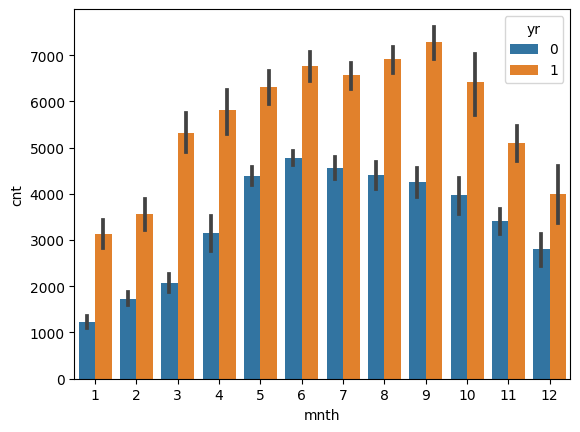

In [39]:
sns.barplot(data=df, x='mnth',y='cnt',hue='yr')

In [40]:
df['yr'].value_counts()

1    366
0    365
Name: yr, dtype: int64

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

> Датасет формировался в течение двух лет с учетом внешних независимых факторов: сезон/месяц, день недели: будний/праздничный, температура, влажность, скорость ветра.

> Распределение значений признака weekday называется равномерным.



<Axes: xlabel='weekday', ylabel='count'>

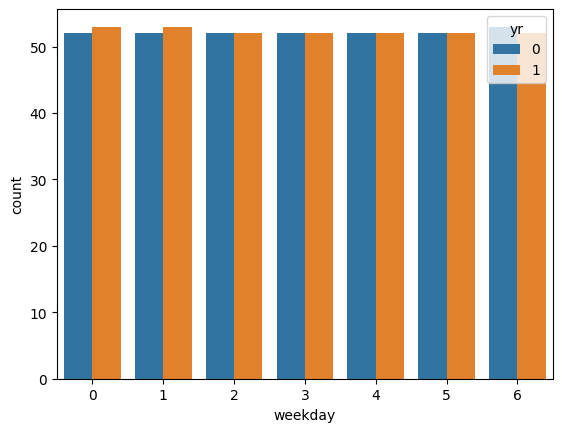

In [56]:
sns.countplot(data=df,x= 'weekday', hue="yr")

<Axes: xlabel='weathersit', ylabel='count'>

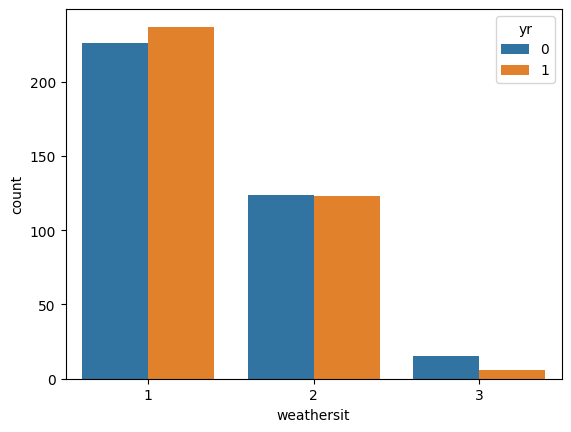

In [57]:
sns.countplot(data=df,x= 'weathersit', hue="yr")

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

> В день приблизительно 4500 прокатов.

> Полученное распределение называется равномерным.



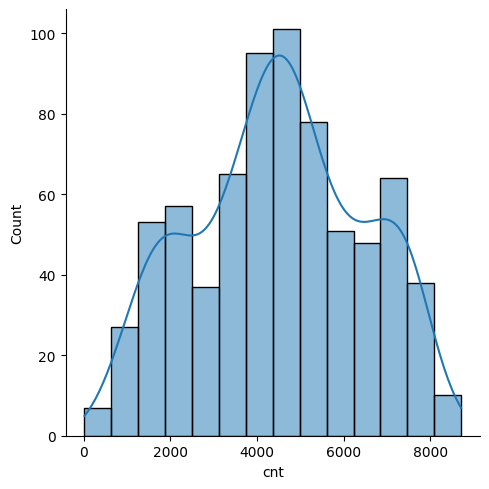

In [60]:
sns.displot(df['cnt'], kde = True);

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

> Как мы ранее уже выявили, наиболее высокая корреляция количества прокатов как раз с признаками температуры и ощущения температуры. Эти признаки линейно зависимы, что подтверждает график.




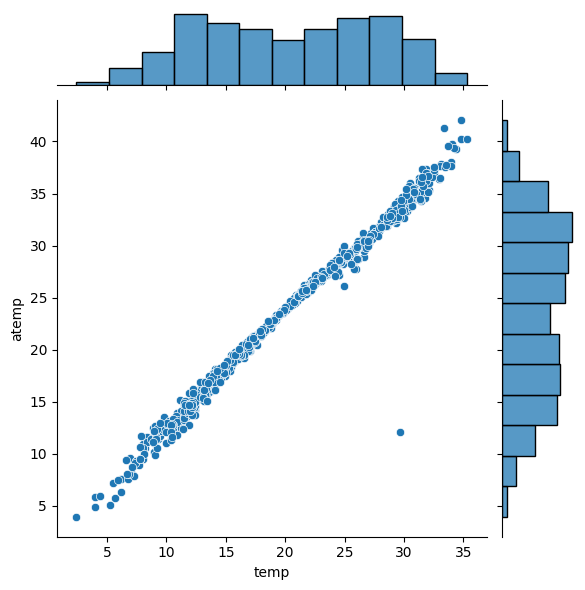

In [62]:
sns.jointplot(x='temp', y='atemp', data=df)

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


> В некоторых месяцах больше праздничных (нерабочих) будних дней, а также летние месяцы (июль-август) традиционно являются каникулами/отпуском.

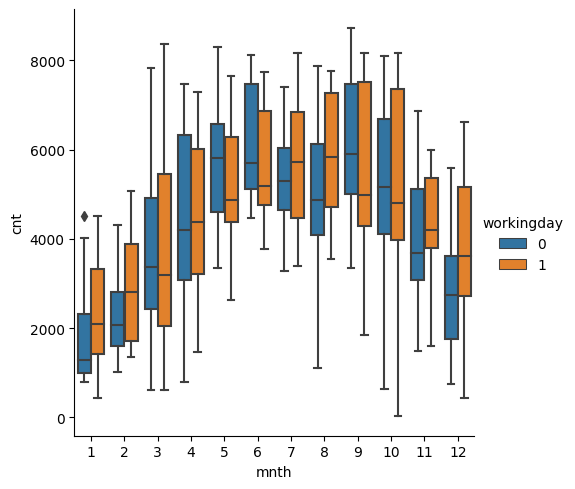

In [77]:
sns.catplot(data=df, x="mnth", y="cnt", hue='workingday', kind="box")

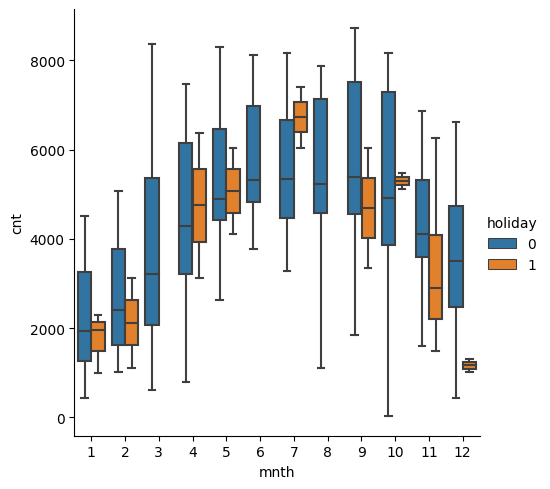

In [78]:
sns.catplot(data=df, x="mnth", y="cnt", hue='holiday', kind="box")

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение:
> Ранее на корреляционной матрице мы увидели, что коэффициент корреляции между скоростью ветра и ощущением температуры равен -0,18. на основании этого уже можно сделать вывод, что значимой взаимосвязи между этими признаками нет. Для большей наглядности построим график совместного распределения признаков. По распределению точек на графике мы можем сделать вывод, что данная гипотеза о зависимости ощущения температуры от скорости ветра - ошибочна.

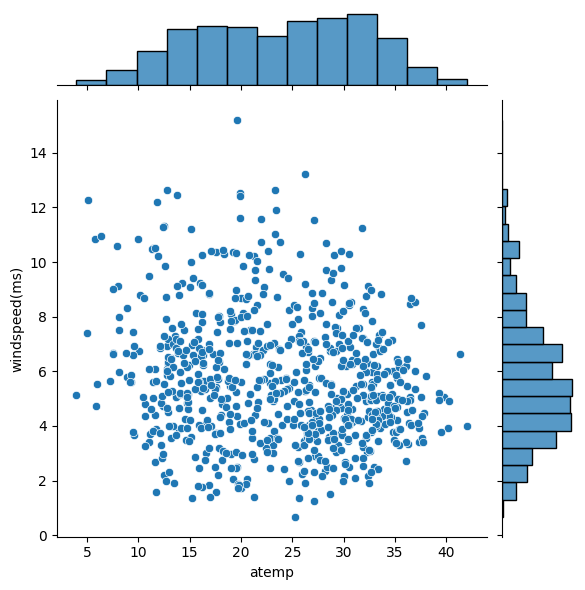

In [79]:
sns.jointplot(x='atemp', y='windspeed(ms)', data=df)